1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).


In [58]:
import numpy as np
print(np.random.randint(37))

30


2.<br> 
Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.<br>
Сгенерируйте десять выборок случайных чисел х0, …, х9. <br>
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9

In [78]:
s = ''
n = 10000
for i in range(n):
    s += str(np.random.randint(2))
counter = 0
for i in range(n - 1):
    if s[i:i+2] == '00':
        counter += 1
print(counter / n)
print((n - 1) / 4 / n)


0.2462
0.249975


В цикле мы считаем сколько раз должно появиться 2 орла подряд, если посчитать то получаем (n-1) / 4. тоесть два орла выпадают в 1/4 случаев

(array([2., 1., 2., 4., 1.]),
 array([3.91765362, 4.37813602, 4.83861841, 5.2991008 , 5.75958319,
        6.22006559]),
 <BarContainer object of 5 artists>)

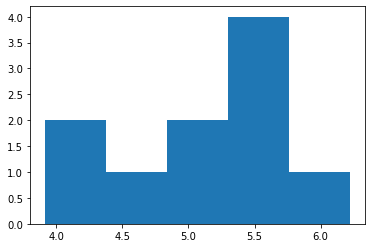

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
x = []
n = 10
for i in range(n):
    x.append(np.random.rand(10))
a = sum(x)
plt.hist(a, bins=5)

3.<br>
Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.<br>
Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.<br>



In [108]:
from math import factorial as fc
def c_n_k(n, k):
    return fc(n)/ fc(k) / fc(n-k)
def P(n, k):
    return c_n_k(n, k) / 2**n

k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
#print(a, b, c, d)
#print(x)
print(k, n, k/n)
print(f'должно получаться: {P(4, 2)}')
n, k = 5, 4
print(f'для n = {n} и k = {k}\nбиномиальный коэффициент: {c_n_k(n, k)}\n'
    f'вероятность :{P(n , k)}')
n, k = 7, 4
print(f'для n = {n} и k = {k}\nбиномиальный коэффициент: {c_n_k(n, k)}\n'
    f'вероятность :{P(n , k)}')
n, k = 10, 2
print(f'для n = {n} и k = {k}\nбиномиальный коэффициент: {c_n_k(n, k)}\n'
    f'вероятность :{P(n , k)}')
n, k = 6, 1
print(f'для n = {n} и k = {k}\nбиномиальный коэффициент: {c_n_k(n, k)}\n'
    f'вероятность :{P(n , k)}')

3797 10000 0.3797
должно получаться: 0.375
для n = 5 и k = 4
биномиальный коэффициент: 5.0
вероятность :0.15625
для n = 7 и k = 4
биномиальный коэффициент: 35.0
вероятность :0.2734375
для n = 10 и k = 2
биномиальный коэффициент: 45.0
вероятность :0.0439453125
для n = 6 и k = 1
биномиальный коэффициент: 6.0
вероятность :0.09375


4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k


In [109]:
import itertools
for p in itertools.permutations("0123",2):
    print(''.join(str(x) for x in p))

01
02
03
10
12
13
20
21
23
30
31
32


In [111]:
for p in itertools.permutations("01235",3):
    print(''.join(str(x) for x in p))

012
013
015
021
023
025
031
032
035
051
052
053
102
103
105
120
123
125
130
132
135
150
152
153
201
203
205
210
213
215
230
231
235
250
251
253
301
302
305
310
312
315
320
321
325
350
351
352
501
502
503
510
512
513
520
521
523
530
531
532


In [114]:
for p in itertools.permutations("0123456",2):
    print(''.join(str(x) for x in p))

01
02
03
04
05
06
10
12
13
14
15
16
20
21
23
24
25
26
30
31
32
34
35
36
40
41
42
43
45
46
50
51
52
53
54
56
60
61
62
63
64
65


5. Дополните код расчетом коэффициента корреляции x и y по формуле


0.6986961724480613 0.1363312373715011
0.6986961724480616 0.13633123737150088


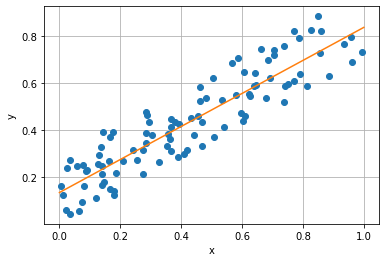

R = 0.9096284785375246


In [121]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
xm = np.mean(x)
ym = np.mean(y)
a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n
R = np.sum((x-xm) * (y-ym)) / np.sqrt(np.sum((x-xm) * (x-xm)) * np.sum((y-ym) * (y-ym)))
A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

print(f'R = {R}')